In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
comments = pd.read_csv(r'/content/UScomments.csv' , on_bad_lines='skip')

/tmp/ipython-input-3-2261780761.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r'/content/UScomments.csv' , on_bad_lines='skip')


In [4]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [5]:
## Finding out missing values in data
comments.isnull().sum()

,0
video_id,0
comment_text,26
likes,0
replies,0


In [6]:
## drop missing values as there are very few
comments.dropna(inplace=True)

In [7]:
comments.isnull().sum()

,0
video_id,0
comment_text,0
likes,0
replies,0


In [9]:
# Using for sentiment analysis using NLTK library
!pip install textblob

In [10]:
from textblob import TextBlob

In [11]:
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [12]:
comments.shape

(691374, 4)

In [13]:
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [14]:
len(polarity)

691374

In [15]:
### Inserting polarity values into comments dataframe while defining feature name as "polarity"
comments['polarity']  = polarity

In [16]:
comments.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## Workd Cloud Analysis

In [22]:
### Performing EDA for the highly Positve sentences ie Polarity value will be 1

In [23]:
filter1 = comments['polarity']==1

In [24]:
comments_positive = comments[filter1]

In [25]:
filter2 = comments['polarity']==-1
comments_negative = comments[filter2]

In [26]:
comments_positive.head(5)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [27]:
!pip install wordcloud

In [28]:
from wordcloud import WordCloud , STOPWORDS

In [29]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [30]:
comments['comment_text']

,comment_text
0,Logan Paul it's yo big day ‼️‼️‼️
1,I've been following you from the start of your...
2,Say hi to Kong and maverick for me
3,MY FAN . attendance
4,trending 😉
...,...
691395,Лучшая
691396,qu'est ce que j'aimerais que tu viennes à Roan...
691397,Ven a mexico! 😍 te amo LP
691398,Islığı yeter...


In [31]:
type(comments['comment_text'])

pandas.core.series.Series

In [32]:
### for wordcloud , we need to frame our 'comment_text' feature into string ..
total_comments_positive = ' '.join(comments_positive['comment_text'])

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

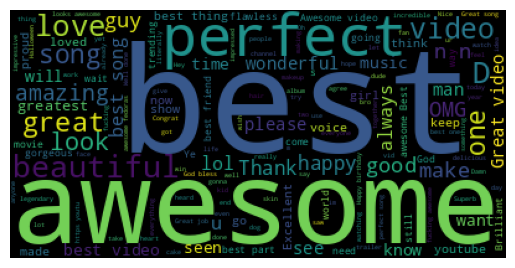

In [34]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)
plt.imshow(wordcloud)
plt.axis('off')

### **Conclusion-->> positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy  etc..**

In [35]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

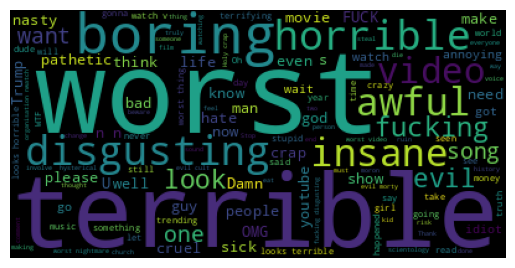

In [36]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)
plt.imshow(wordcloud2)
plt.axis('off')

## **Conclusion-->> Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..**

# Performing Emoji Analyses

In [37]:
!pip install emoji==2.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234910 sha256=1c3ab6281fcacd57f32a82ef44d3bca0040dfedde5966b99c354d69867b8ab54
  Stored in directory: /root/.cache/pip/wheels/a1/d5/63/4dbdee6f4e23f24b771ea5ac6c9ebe3d7e227028c60e06ead3
Successfully built emoji


In [38]:
import emoji
emoji.__version__

'2.2.0'

In [39]:
comments['comment_text'].head(6)

,comment_text
0,Logan Paul it's yo big day ‼️‼️‼️
1,I've been following you from the start of your...
2,Say hi to Kong and maverick for me
3,MY FAN . attendance
4,trending 😉
5,#1 on trending AYYEEEEE


In [43]:
# Extracting emoji from comments
all_emojis_list = []

for comment in comments['comment_text'].dropna(): ## in case u have missing values , call dropna()
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [44]:
from collections import Counter

In [46]:
### To compute frequencies of each & every emoji in "all_emojis_list"..
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [47]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]

In [50]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [48]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [51]:
trace = go.Bar(x=emojis , y=freqs)
iplot([trace])

## **Conclusions : Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..**

# Collecting Data from Youtube

In [52]:
import os

In [53]:
files= os.listdir(r'/content/additional data')
files

['MX_category_id.json',
 'RUvideos.csv',
 'CA_category_id.json',
 'KRvideos.csv',
 'MXvideos.csv',
 'FRvideos.csv',
 'US_category_id.json',
 'UScomments.csv',
 'GB_category_id.json',
 'DE_category_id.json',
 'INvideos.csv',
 'JPvideos.csv',
 'RU_category_id.json',
 'IN_category_id.json',
 'GBvideos.csv',
 'JP_category_id.json',
 'DEvideos.csv',
 'KR_category_id.json',
 'FR_category_id.json',
 'USvideos.csv',
 'CAvideos.csv']

In [54]:
## extracting csv files only from above list ..

files_csv = [file for file in files if '.csv' in file]
files_csv

['RUvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'FRvideos.csv',
 'UScomments.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'GBvideos.csv',
 'DEvideos.csv',
 'USvideos.csv',
 'CAvideos.csv']

In [57]:
full_df = pd.DataFrame()
path = r'/content/additional data'


for file in files_csv:
    current_df = pd.read_csv(path+'/'+file , encoding='iso-8859-1' , on_bad_lines='skip')

    full_df = pd.concat([full_df , current_df] , ignore_index=True)

In [58]:
full_df.shape

(1067342, 18)

In [59]:
full_df[full_df.duplicated()].shape

(249110, 18)

In [60]:
# Dropping deuplicate rows
full_df = full_df.drop_duplicates()

In [61]:
full_df.shape

(818232, 18)

In [65]:
### you can consider sample of data depending on how efficient your system is..

full_df[0:1000].to_csv(r'/content/export_data/youtube_sample.csv' , index=False)

In [66]:
full_df[0:1000].to_json(r'/content/export_data/youtube_sample.json')

# Which category has maximum likes

In [67]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,comment_text,replies
0,gDuslQ9avLc,17.14.11,ÐÐ°Ñ Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...,Ð¢âÐ ÐÐÐÐÐ§,22.0,2017-11-13T09:09:31.000Z,"Ð·Ð°Ñ Ð°Ñ Ð¸ Ð¿Ð¾Ð»Ð¸Ð½Ð°|""ÑÑÐ¸Ð¼ÑÑ ÑÐºÐ...",62408.0,334,190.0,50.0,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"ÐÐ½Ð°ÐºÐ¾Ð¼ÑÑÐµÑÑ, ÑÑÐ¾ ÐÐ°Ñ Ð°Ñ Ð¸ Ð...",NaN,NaN
1,AOCJIFEA_jE,17.14.11,ÐÐ¸ÑÐ¶Ð° ÐÐµÐ¼Ð¾Ð² #29. ÐÐ¾Ð»ÑÑÐ¾Ð¸Ì Ð²...,Druzhko Show,22.0,2017-11-13T17:32:11.000Z,"Ð±Ð¸ÑÐ¶Ð° Ð¼ÐµÐ¼Ð¾Ð²|""Ð»ÐµÐ² ÑÐ°Ð³Ð¸Ð½ÑÐ½""|...",330043.0,43841,2244.0,2977.0,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,Ð 29 Ð²ÑÐ¿ÑÑÐºÐµ ÐÑÑÐ¶ÐºÐ¾ Ð¨Ð¾Ñ Ð¡ÐµÑ...,NaN,NaN
2,VAWNQDgwwOM,17.14.11,Ð¥ÐÐÐ ÐÐ­ÐÐ - Ð¡ÐÐÐ Ð¡Ð ÐÐÐ Ð§Ð£Ð...,Ð®Ð»Ð¸Ðº,24.0,2017-11-13T16:11:31.000Z,"ÑÐ¼Ð¾Ñ|""ÐºÐ¾Ð¼ÐµÐ´Ð¸Ñ""|""Ð²Ð»Ð¾Ð³""|""Ð±Ð»Ð¾Ð³...",424596.0,49854,714.0,2944.0,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Ð¤Ð°ÐºÑÐ»ÑÑ...,NaN,NaN
3,gknkFwKQfHg,17.14.11,Ð¡Ð¾ÑÐ½Ð°Ñ ÐºÐµÑÐ°Ð´Ð¸Ð»ÑÑ Ñ ÐºÑÑÐ¸ÑÐµÐ¹,Hochland,22.0,2017-11-13T06:51:10.000Z,"Ñ Ð¾Ñ Ð»Ð°Ð½Ð´|""ÑÑÑ""|""ÑÐµÑÐµÐ¿ÑÑ""|""ÐºÐ°...",112851.0,3566,122.0,80.0,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** ÐºÐ°Ðº Ð³Ð¾ÑÐ¾Ð²Ð¸ÑÑ ÑÐµÑÑÐ¾ÑÐ°Ð½Ð½...,NaN,NaN
4,3sYvZcwzZr8,17.14.11,ÐÐÐÐÐ« Ð ÐÐÐÐ¢ÐÐÐÐ ÐÐ Ð¨ÐÐÐÐ¬Ð...,Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½,24.0,2017-11-13T16:52:36.000Z,"Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½|""Sovergon""|""ÐºÐ»Ð¸Ð¿Ñ""|""ÑÐ¾...",243469.0,36216,631.0,1692.0,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,â ÐÐÐÐÐ£Ð Ð¡ ÐÐÐÐÐ¢ÐÐÐ«: http://ka...,NaN,NaN


In [68]:
full_df['category_id'].unique()

array([22., 24., 28., 23., 27., 17.,  2., 25., 15., 20.,  1., 43., 26.,
       10., 29., 19., 30., 44., nan])

In [73]:
## lets read json file ..
json_df = pd.read_json(r'/content/additional data/US_category_id.json')
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [75]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [76]:
cat_dict = {}

for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [77]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,comment_text,replies,category_name
0,gDuslQ9avLc,17.14.11,ÐÐ°Ñ Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...,Ð¢âÐ ÐÐÐÐÐ§,22.0,2017-11-13T09:09:31.000Z,"Ð·Ð°Ñ Ð°Ñ Ð¸ Ð¿Ð¾Ð»Ð¸Ð½Ð°|""ÑÑÐ¸Ð¼ÑÑ ÑÐºÐ...",62408.0,334,190.0,50.0,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"ÐÐ½Ð°ÐºÐ¾Ð¼ÑÑÐµÑÑ, ÑÑÐ¾ ÐÐ°Ñ Ð°Ñ Ð¸ Ð...",NaN,NaN,People & Blogs
1,AOCJIFEA_jE,17.14.11,ÐÐ¸ÑÐ¶Ð° ÐÐµÐ¼Ð¾Ð² #29. ÐÐ¾Ð»ÑÑÐ¾Ð¸Ì Ð²...,Druzhko Show,22.0,2017-11-13T17:32:11.000Z,"Ð±Ð¸ÑÐ¶Ð° Ð¼ÐµÐ¼Ð¾Ð²|""Ð»ÐµÐ² ÑÐ°Ð³Ð¸Ð½ÑÐ½""|...",330043.0,43841,2244.0,2977.0,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,Ð 29 Ð²ÑÐ¿ÑÑÐºÐµ ÐÑÑÐ¶ÐºÐ¾ Ð¨Ð¾Ñ Ð¡ÐµÑ...,NaN,NaN,People & Blogs
2,VAWNQDgwwOM,17.14.11,Ð¥ÐÐÐ ÐÐ­ÐÐ - Ð¡ÐÐÐ Ð¡Ð ÐÐÐ Ð§Ð£Ð...,Ð®Ð»Ð¸Ðº,24.0,2017-11-13T16:11:31.000Z,"ÑÐ¼Ð¾Ñ|""ÐºÐ¾Ð¼ÐµÐ´Ð¸Ñ""|""Ð²Ð»Ð¾Ð³""|""Ð±Ð»Ð¾Ð³...",424596.0,49854,714.0,2944.0,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Ð¤Ð°ÐºÑÐ»ÑÑ...,NaN,NaN,Entertainment
3,gknkFwKQfHg,17.14.11,Ð¡Ð¾ÑÐ½Ð°Ñ ÐºÐµÑÐ°Ð´Ð¸Ð»ÑÑ Ñ ÐºÑÑÐ¸ÑÐµÐ¹,Hochland,22.0,2017-11-13T06:51:10.000Z,"Ñ Ð¾Ñ Ð»Ð°Ð½Ð´|""ÑÑÑ""|""ÑÐµÑÐµÐ¿ÑÑ""|""ÐºÐ°...",112851.0,3566,122.0,80.0,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** ÐºÐ°Ðº Ð³Ð¾ÑÐ¾Ð²Ð¸ÑÑ ÑÐµÑÑÐ¾ÑÐ°Ð½Ð½...,NaN,NaN,People & Blogs


In [82]:
full_df['likes'] = pd.to_numeric(full_df['likes'], errors='coerce').astype('Int64')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'People & Blogs'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Science & Technology'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Education'),
  Text(5, 0, 'Sports'),
  Text(6, 0, 'Autos & Vehicles'),
  Text(7, 0, 'News & Politics'),
  Text(8, 0, 'Pets & Animals'),
  Text(9, 0, 'Gaming'),
  Text(10, 0, 'Film & Animation'),
  Text(11, 0, 'Shows'),
  Text(12, 0, 'Howto & Style'),
  Text(13, 0, 'Music'),
  Text(14, 0, 'Nonprofits & Activism'),
  Text(15, 0, 'Travel & Events'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

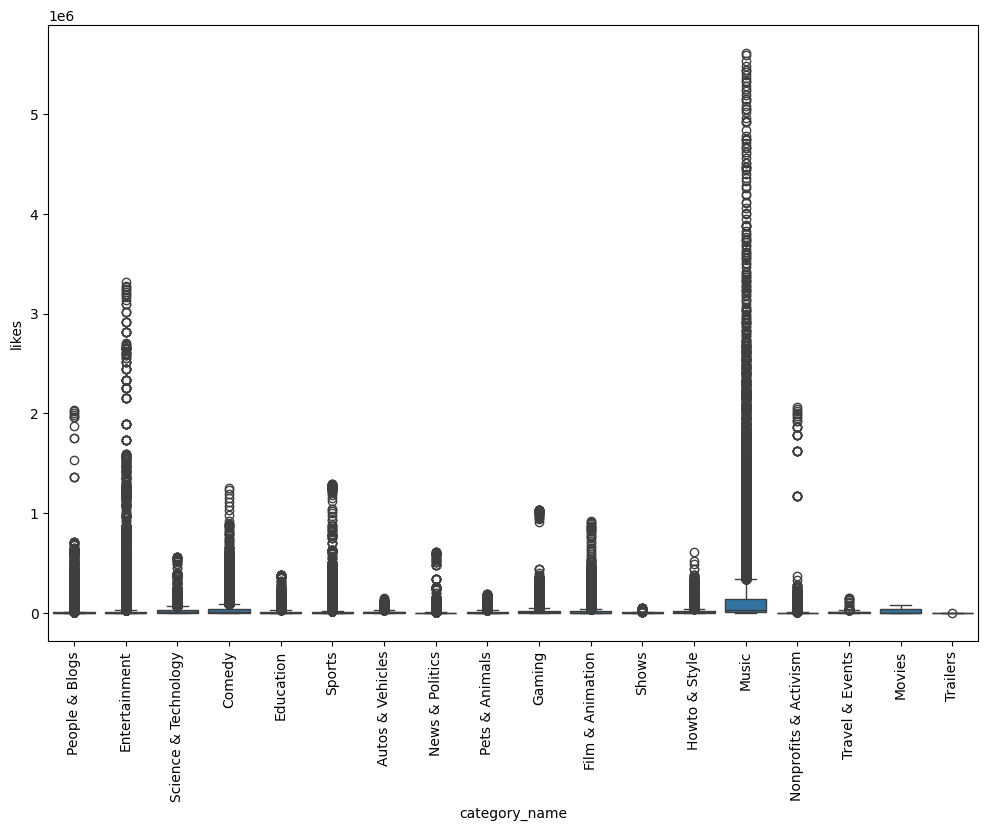

In [83]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name' , y='likes' , data=full_df)
plt.xticks(rotation='vertical')

# Find out wheter audience is engaged or not

In [84]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

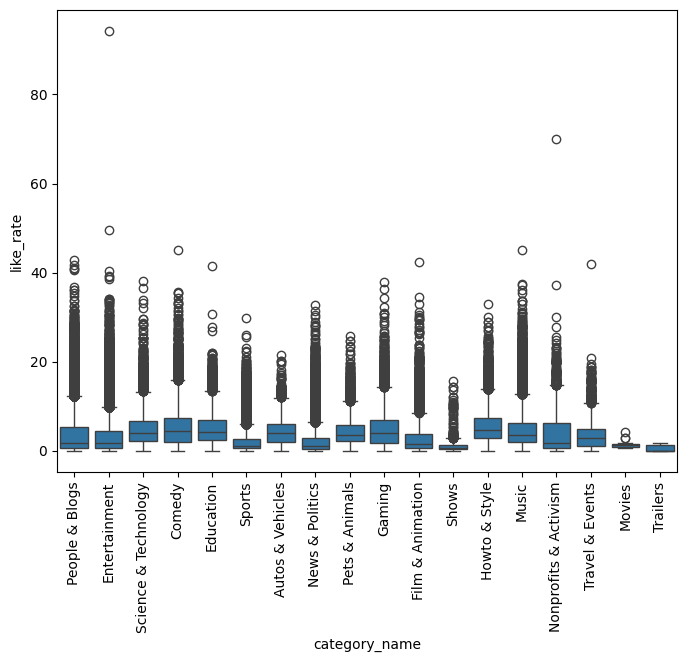

In [85]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name' , y='like_rate' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='views', ylabel='likes'>

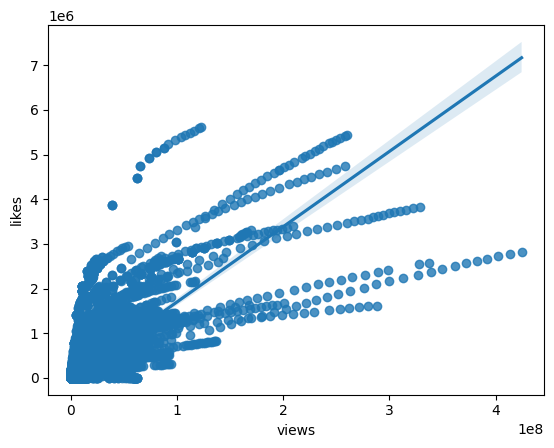

In [86]:
### analysing relationship between views & likes
sns.regplot(x='views' , y='likes' , data = full_df)

<Axes: >

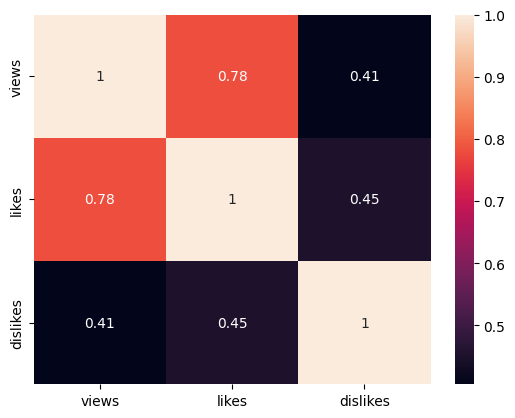

In [87]:
### finding co-relation values between ['views', 'likes', 'dislikes']
full_df[['views', 'likes', 'dislikes']].corr()
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr() , annot=True)

# Which channel has largest number of trending videos

In [88]:
full_df['channel_title'].value_counts()

,count
channel_title,
The Late Show with Stephen Colbert,710
WWE,643
Late Night with Seth Meyers,592
TheEllenShow,555
Jimmy Kimmel Live,528
...,...
Ð¡ÐµÑÐ³ÐµÐ¹ Ð,1
Beau-Ann Goldenchild,1
Garden Answer,1


In [89]:
### lets obtain above frequency table using groupby approach :
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()
cdf = cdf.rename(columns={0:'total_videos'})
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Tesoros Enterrados,1
37820,Anton Neverov,1
37821,Thalia 444,1
37822,Thaitv6 Official,1


In [90]:
import plotly.express as px
px.bar(data_frame=cdf[0:20] , x='channel_title' , y='total_videos')